In [122]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

file=uproot.open("snb_radio_dune10kt_1x2x6_8073_20171222T211546_reco0_extracted_hist.root")

print("\n",file.keys())

signal_tree=file["dataextract/SignalTree"]
wire_tree  =file["dataextract/WireTree"]

print(wire_tree.show())



 ['dataextract;1', 'dataextract/MCTruthTree;1', 'dataextract/WireTree;1', 'dataextract/SignalTree;1']
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EventID              | int32_t                  | AsDtype('>i4')
Channel              | int32_t                  | AsDtype('>i4')
View                 | int32_t                  | AsDtype('>i4')
HitWire              | int32_t                  | AsDtype('>i4')
HitTPC               | int32_t                  | AsDtype('>i4')
HitPlane             | int32_t                  | AsDtype('>i4')
HitCryostat          | int32_t                  | AsDtype('>i4')
None


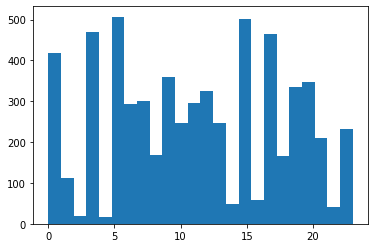

In [92]:
plt.hist(wire_tree["HitTPC"].array(),24,[0,23]);
#Value of tpc goes from 0 to 23, 24 TPCs, then each one has 3 planes 


In [123]:
Event_label=np.array(wire_tree["EventID"].array())
TPC_label  =np.array(wire_tree["HitTPC"].array())
plane_label=np.array(wire_tree["HitPlane"].array())
sig_label  =np.array(signal_tree.keys());
Wire_label =np.array(wire_tree["HitWire"].array())

Events=np.unique(Event_label)

#they differ by 1, first signal key is Signal_0
print("Number of signal elements:        ",len(Event_label)
   ,"\nName of first key in Signal Tree: ", sig_label[0]
   ,"\nName of last  key in Signal Tree: ", sig_label[-1])


for ev in Events: #loop over all events
   sel_ev   = Event_label == ev                    #from list, get only the elements of each event
   sel_plane= plane_label == 1                     #select fixed TPC and plane
   sel_TPC  = TPC_label   == 0                     #select fixed TPC and plane

   sel_sig  = sig_label [sel_ev*sel_plane*sel_TPC]#get the labels for the branches that form each picture
   sel_wireN= Wire_label[sel_ev*sel_plane*sel_TPC]#and the real number of each wire


Number of signal elements:         6186 
Name of first key in Signal Tree:  Signal_0 
Name of last  key in Signal Tree:  Signal_6185


In [130]:
sel_sig[sel_wireN==1083]

array(['Signal_1520', 'Signal_1521', 'Signal_1522'], dtype='<U11')

In [184]:
Nrow = len(signal_tree[sel_sig[0]].array()[0])
Ncol = max(sel_wireN)
pic=np.zeros([Nrow,Ncol])
for wire,sig in zip(sel_wireN,sel_sig):
    pic[:,wire-1]=signal_tree[sig].array()[0]

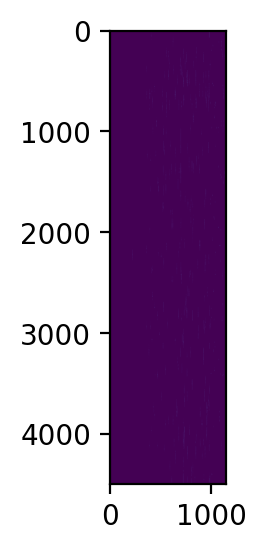

In [185]:
plt.figure(figsize=[3,3],dpi=200)
plt.imshow(np.abs(pic),interpolation=None);

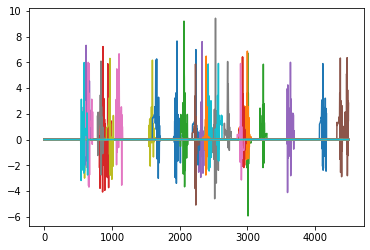

In [198]:
for i in range(30):
    plt.plot(signal_tree["Signal_"+str(i)].array()[0])
    # plt.xlim([3800,4500])